# TASK 2 :- MOVIE RATING PREDICTION WITH PYTHON

* Objective: To Build a model that predicts the rating of a movie based on features like genre, director, and actors. Using regression techniques. 
* Dataset Used: https://www.kaggle.com/datasets/adrianmcmahon/imdb-india-movies

In [1]:
import pandas as pd

In [2]:
#loading dataset

df = pd.read_csv('C:/Users/sajid/Desktop/SAJID Personal/VCET/Internship/Encryptix/data/IMDbMoviesIndia.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15508 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [3]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,Moonlight: Unfortunately a Love Story,-2006.0,NaN,Comedy,NaN,"5,160,000",Raman Bharadwaj,Kim Sharma,Shekhar Suman,Perizaad Zorabian
1,Life of Pi,-2012.0,127 min,"Adventure, Drama, Fantasy",7.9,"591,417",Ang Lee,Suraj Sharma,Irrfan Khan,Adil Hussain
2,3 Idiots,-2009.0,170 min,"Comedy, Drama",8.4,"357,889",Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
3,Lion,-2016.0,118 min,"Biography, Drama",8.0,"220,526",Garth Davis,Dev Patel,Nicole Kidman,Rooney Mara
4,Gandhi,-1982.0,191 min,"Biography, Drama, History",8.0,"220,118",Richard Attenborough,Ben Kingsley,John Gielgud,Rohini Hattangadi


In [4]:
df.isnull().sum()

Name           1
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

# Feature Engineering
* Handling Missing Values and Data Types
* dropping duplicate rows
* Converting 'Year', 'Votes' to integer

In [5]:
#removing duplicate rows
df.drop_duplicates(inplace= True)

#dropping unnecessary columns
df.drop(columns= ['Name', 'Duration'], axis=1, inplace= True)

df.head()

,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,-2006.0,Comedy,NaN,"5,160,000",Raman Bharadwaj,Kim Sharma,Shekhar Suman,Perizaad Zorabian
1,-2012.0,"Adventure, Drama, Fantasy",7.9,"591,417",Ang Lee,Suraj Sharma,Irrfan Khan,Adil Hussain
2,-2009.0,"Comedy, Drama",8.4,"357,889",Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
3,-2016.0,"Biography, Drama",8.0,"220,526",Garth Davis,Dev Patel,Nicole Kidman,Rooney Mara
4,-1982.0,"Biography, Drama, History",8.0,"220,118",Richard Attenborough,Ben Kingsley,John Gielgud,Rohini Hattangadi


In [6]:
# Filling missing values for numerical columns with the median

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df[column].fillna(df[column].median(), inplace=True)

# Filling missing values for categorical columns with the mode

for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)


In [7]:

df['Year'] = abs(df['Year']).astype(int)

In [8]:
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)
df.isnull().sum()


Year        0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [9]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 15503 entries, 0 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      15503 non-null  int32  
 1   Genre     15503 non-null  object 
 2   Rating    15503 non-null  float64
 3   Votes     15503 non-null  int32  
 4   Director  15503 non-null  object 
 5   Actor 1   15503 non-null  object 
 6   Actor 2   15503 non-null  object 
 7   Actor 3   15503 non-null  object 
dtypes: float64(1), int32(2), object(5)
memory usage: 968.9+ KB


,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,2006,Comedy,6.0,5160000,Raman Bharadwaj,Kim Sharma,Shekhar Suman,Perizaad Zorabian
1,2012,"Adventure, Drama, Fantasy",7.9,591417,Ang Lee,Suraj Sharma,Irrfan Khan,Adil Hussain
2,2009,"Comedy, Drama",8.4,357889,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
3,2016,"Biography, Drama",8.0,220526,Garth Davis,Dev Patel,Nicole Kidman,Rooney Mara
4,1982,"Biography, Drama, History",8.0,220118,Richard Attenborough,Ben Kingsley,John Gielgud,Rohini Hattangadi


### Converting Categorical Data into Numerical Data
* we need to convert categorical variables (like genre, director, actors) into numerical formats to use in ML models
* we will use Mean Encoding because if we use one-hot encoding the number of features will  increase drastically.

In [10]:
## performing mean encoding
df['Genre'] = round(df.groupby('Genre')['Rating'].transform('mean'),1)
df['Votes'] = round(df.groupby('Votes')['Rating'].transform('mean'),1)
df['Director'] = round(df.groupby('Director')['Rating'].transform('mean'),1)
df['Actor 1'] = round(df.groupby('Actor 1')['Rating'].transform('mean'),1)
df['Actor 2'] = round(df.groupby('Actor 2')['Rating'].transform('mean'),1)
df['Actor 3'] = round(df.groupby('Actor 3')['Rating'].transform('mean'),1)

df.head()

,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,2006,5.8,6.0,6.0,6.0,6.0,5.1,5.6
1,2012,6.3,7.9,7.9,7.9,7.9,5.9,7.5
2,2009,5.9,8.4,8.4,8.1,6.9,6.3,8.4
3,2016,6.5,8.0,8.0,8.0,7.8,8.0,8.0
4,1982,6.8,8.0,8.0,8.0,8.0,8.0,6.5


# Exploratory Data Analysis
* Visualizing some of the data to understand the relationships between features and the target variable (Rating).

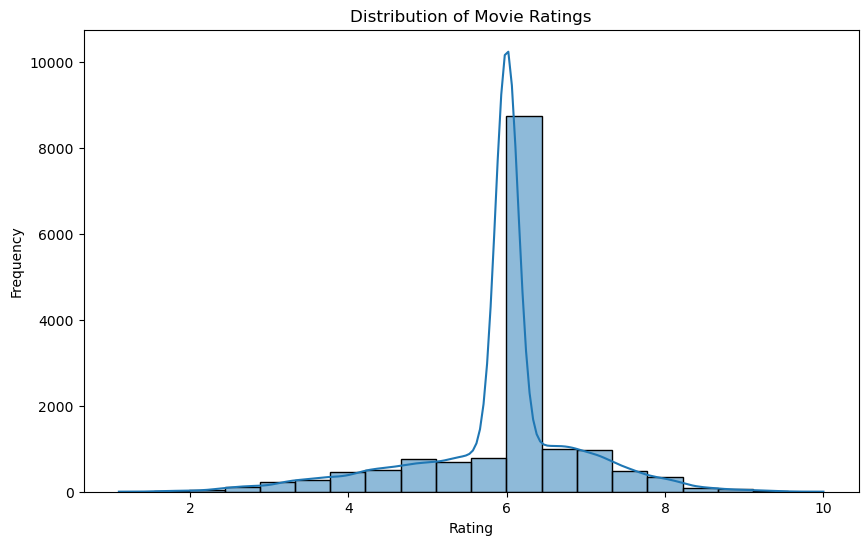

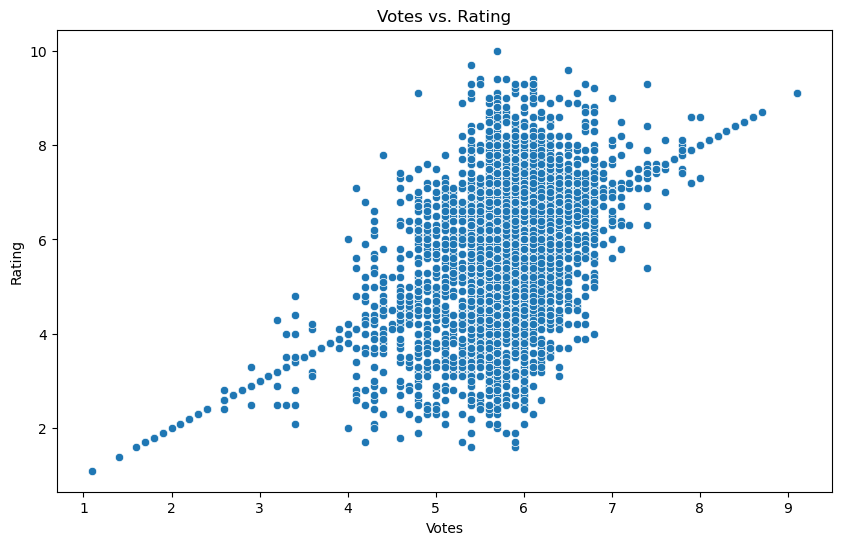

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of ratings

plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Plotting Votes vs. Rating

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Rating', data=df)
plt.title('Votes vs. Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()

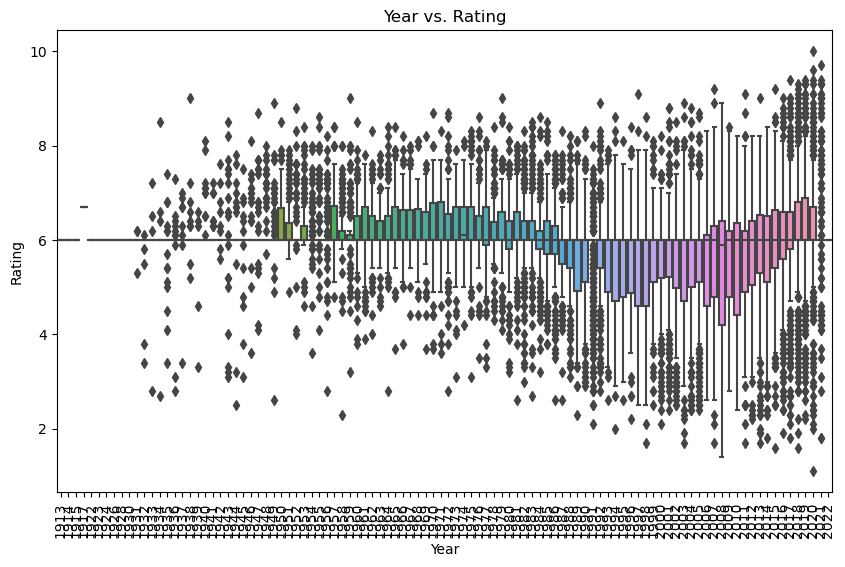

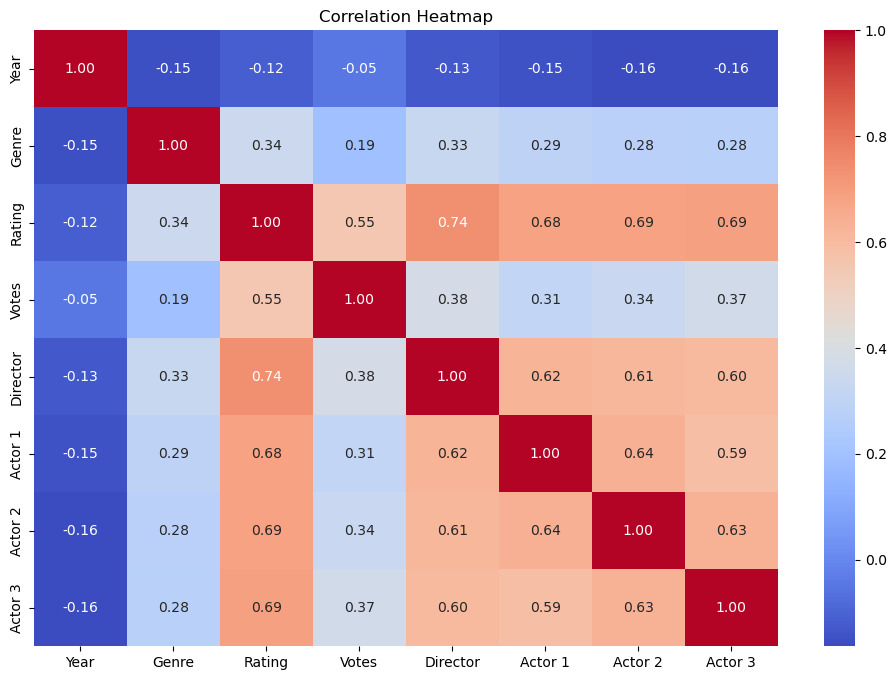

In [12]:
# Plotting Year vs. Rating

plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Rating', data=df)
plt.title('Year vs. Rating')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

# Ensure all columns used for correlation are numeric

numeric_df = df.select_dtypes(include=[float, int])


# Plotting a correlation heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Model Selection & Training
* We use Linear regression and Random Forest Regressor and compare which has better R-squared value.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Splitting the data into training and testing sets
X = df.drop(columns=['Rating'])
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* Linear Regression

In [14]:
# Initialize and train the Linera Regression model
lrmodel = LinearRegression()
lrmodel.fit(X_train, y_train)

# Predict on the test set
lr_y_pred = lrmodel.predict(X_test)

# Evaluate the model
lr_mae = mean_absolute_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)

# Display evaluation metrics
print(f"Mean Absolute Error: {lr_mae}")
print(f"R-squared: {lr_r2}")

Mean Absolute Error: 0.33541844682427885
R-squared: 0.7303380607140374


* Random Forest Regressor

In [15]:
# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state = 42)
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

# Display evaluation metrics
print(f"Mean Absolute Error: {rf_mae}")
print(f"R-squared: {rf_r2}")

Mean Absolute Error: 0.2343378910029024
R-squared: 0.7869847053949681


* As we can see we got Random Forest Classifier as better model, we now predict using Random Forest Classifier

# Prediction

In [16]:
new_data = pd.DataFrame({
    'Year': [2000],
    'Genre': [4.5],
    'Votes': [15000],
    'Director': [4.2],
    'Actor 1': [4.0],
    'Actor 2': [3.8],
    'Actor 3': [3.6]
})

# Predict using the rf_model
predicted_rating = rf_model.predict(new_data)
print(f"Predicted Movie Rating: {predicted_rating}")

Predicted Movie Rating: [3.749]
